In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cars = pd.read_csv("https://jdgrossman.com/assets/used-cars.tsv", sep="\t")
cars

,type,year,make,model,trim,mileage,price
0,USED,2010,Acura,TL,Base,73936,19388
1,USED,2012,Acura,MDX,Technology Package,32453,34898
2,USED,2010,Acura,TL,Base,34302,22000
3,USED,2009,Acura,TL,SH-AWD,98772,17988
4,USED,2007,Acura,MDX,Base,65677,22777
...,...,...,...,...,...,...,...
1281,USED,2013,Volkswagen,Jetta,SE PZEV,39233,14599
1282,USED,2013,Volkswagen,Jetta,SE PZEV,35939,13599
1283,USED,2013,Volkswagen,Jetta,SE PZEV,31768,14200
1284,USED,2012,Volkswagen,Jetta,S,65985,13495


In [3]:
accords = cars[(cars["make"] == "Honda") & (cars["model"] == "Accord")]


In [4]:
accords

,type,year,make,model,trim,mileage,price
669,USED,2007,Honda,Accord,EX-L V-6,96715,12950
671,USED,2006,Honda,Accord,EX V-6,102644,10998
672,USED,2005,Honda,Accord,LX,111639,7688
673,USED,2001,Honda,Accord,EX,103771,5788
675,USED,2004,Honda,Accord,EX,179819,7988
...,...,...,...,...,...,...,...
894,USED,2012,Honda,Accord,LX,22997,14774
895,USED,2012,Honda,Accord,EX-L V-6,40380,19760
898,USED,2012,Honda,Accord,LX,52880,15971
899,USED,2005,Honda,Accord,Hybrid,126754,11882


In [5]:
X = accords["mileage"]
y = accords["price"]

In [6]:
X = sm.add_constant(X)
# Fit the model
model = sm.OLS(y, X).fit()

In [7]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     348.9
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           2.58e-37
Time:                        04:26:00   Log-Likelihood:                -1122.7
No. Observations:                 122   AIC:                             2249.
Df Residuals:                     120   BIC:                             2255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.068e+04    399.474     51.757      0.0

In [8]:
new_car = pd.DataFrame({"const": [1], "mileage": [50000]})

In [9]:
prediction = model.get_prediction(new_car).summary_frame(alpha=0.05)
print(prediction)

           mean     mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  16285.195458  240.437079   15809.146776   16761.244141  11469.367954   

   obs_ci_upper  
0  21101.022963  


In [10]:
new_car_300k = pd.DataFrame({"const": [1], "mileage": [300000]})
prediction_300k = model.get_prediction(new_car_300k).summary_frame(alpha=0.05)
print(prediction_300k[["mean", "mean_ci_lower", "mean_ci_upper"]])

          mean  mean_ci_lower  mean_ci_upper
0 -5667.200184   -7842.016905   -3492.383462


In [11]:
mileage_range = np.linspace(0, 350000, 200)
X_plot = sm.add_constant(mileage_range)

In [12]:
pred = model.get_prediction(X_plot).summary_frame(alpha=0.05)
pred

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,20675.674587,399.474416,19884.743045,21466.606129,15818.602948,25532.746226
1,20521.235623,392.587265,19743.940160,21298.531085,15666.365857,25376.105388
2,20366.796658,385.754386,19603.029821,21130.563495,15514.074537,25219.518779
3,20212.357694,378.978713,19462.006217,20962.709171,15361.728916,25062.986472
4,20057.918730,372.263372,19320.863161,20794.974298,15209.328923,24906.508536
...,...,...,...,...,...,...
195,-9439.923455,1296.982614,-12007.858767,-6871.988143,-14876.821833,-4003.025077
196,-9594.362419,1305.132917,-12178.434763,-7010.290075,-15038.901159,-4149.823680
197,-9748.801384,1313.284696,-12349.013684,-7148.589083,-15201.018933,-4296.583834
198,-9903.240348,1321.437925,-12519.595474,-7286.885222,-15363.174995,-4443.305701


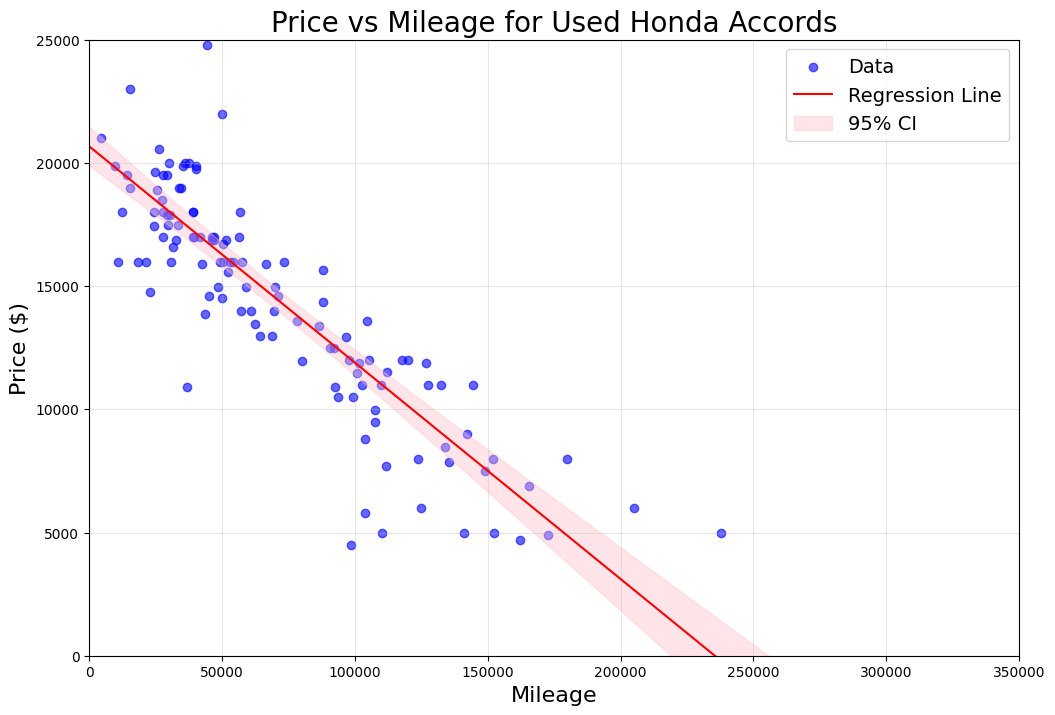

In [13]:
plt.figure(figsize=(12, 8))
plt.scatter(accords["mileage"], accords["price"], color='blue', alpha=0.6, label='Data')
plt.plot(mileage_range, pred['mean'], color='red', label='Regression Line')
plt.fill_between(mileage_range, pred['mean_ci_lower'], pred['mean_ci_upper'], color='pink', alpha=0.4, label='95% CI')


plt.title("Price vs Mileage for Used Honda Accords", fontsize=20)
plt.xlabel("Mileage", fontsize=16)
plt.ylabel("Price ($)", fontsize=16)
plt.xlim(0, 350000)
plt.ylim(0, 25000)
plt.legend(fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

In [14]:
y_log = np.log(accords["price"])
X = sm.add_constant(accords["mileage"])


In [15]:
model_log = sm.OLS(y_log, X).fit()


In [16]:
mileage_range = np.linspace(0, 350000, 200)
X_plot = sm.add_constant(pd.DataFrame({"mileage": mileage_range}))

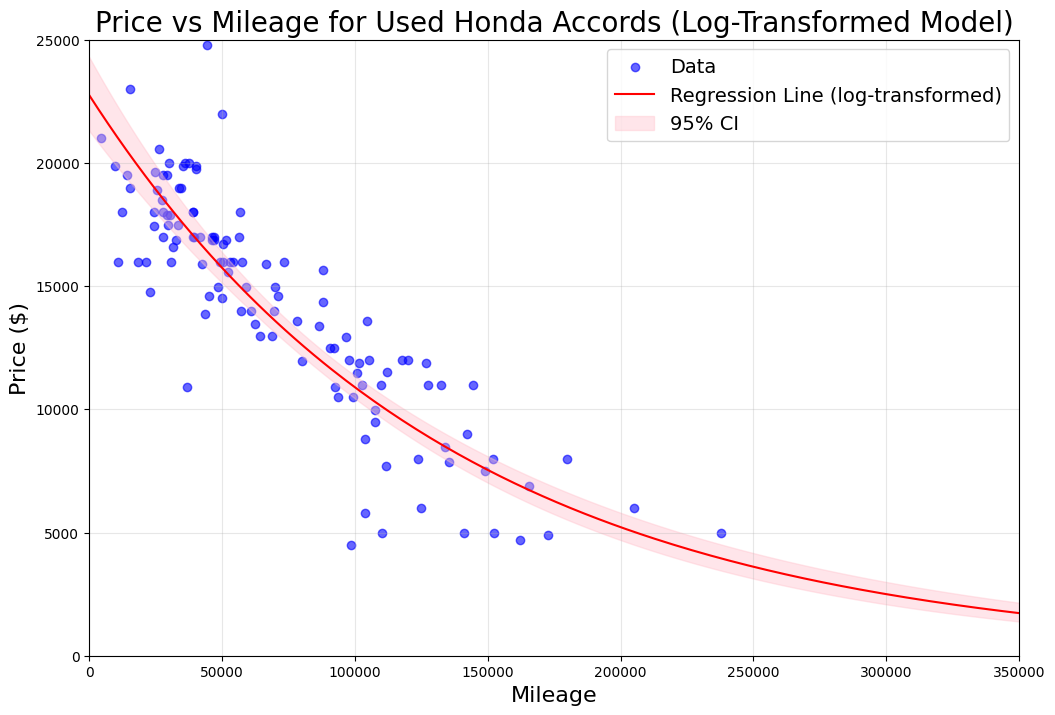

In [17]:

pred_log = model_log.get_prediction(X_plot).summary_frame(alpha=0.05)

pred_mean = np.exp(pred_log["mean"])
pred_lower = np.exp(pred_log["mean_ci_lower"])
pred_upper = np.exp(pred_log["mean_ci_upper"])

plt.figure(figsize=(12, 8))
plt.scatter(accords["mileage"], accords["price"], color='blue', alpha=0.6, label='Data')
plt.plot(mileage_range, pred_mean, color='red', label='Regression Line (log-transformed)')
plt.fill_between(mileage_range, pred_lower, pred_upper, color='pink', alpha=0.4, label='95% CI')
plt.title("Price vs Mileage for Used Honda Accords (Log-Transformed Model)", fontsize=20)
plt.xlabel("Mileage", fontsize=16)
plt.ylabel("Price ($)", fontsize=16)
plt.xlim(0, 350000)
plt.ylim(0, 25000)
plt.legend(fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

In [18]:
mileages = [50000, 300000]
X_new = sm.add_constant(pd.DataFrame({"mileage": mileages}))
X_new

,const,mileage
0,1.0,50000
1,1.0,300000


In [19]:
pred_log = model_log.get_prediction(X_new)
pred_summary = pred_log.summary_frame(alpha=0.05)

In [20]:
pred_summary["mean_price"] = np.exp(pred_summary["mean"])
pred_summary["ci_lower_price"] = np.exp(pred_summary["mean_ci_lower"])
pred_summary["ci_upper_price"] = np.exp(pred_summary["mean_ci_upper"])

print(pred_summary[["mean_price", "ci_lower_price", "ci_upper_price"]])

     mean_price  ci_lower_price  ci_upper_price
0  15745.931389    15136.006977    16380.433471
1   2498.621780     2086.022680     2992.829780


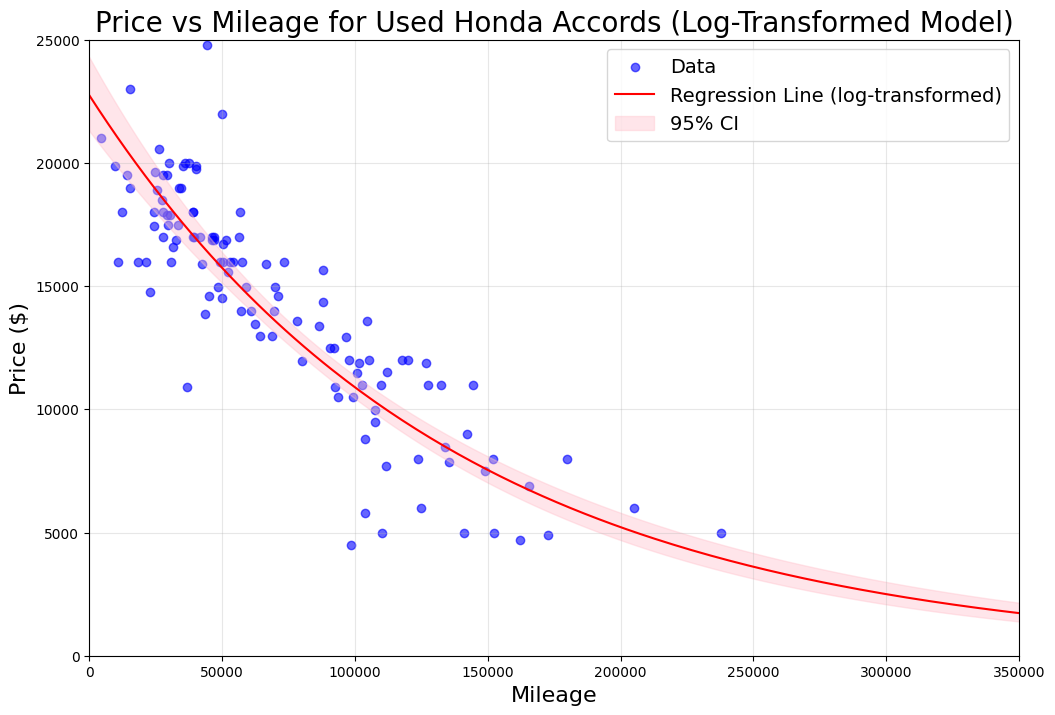

In [21]:
mileage_range = np.linspace(0, 350000, 200)
X_plot = sm.add_constant(pd.DataFrame({"mileage": mileage_range}))

pred_log = model_log.get_prediction(X_plot).summary_frame(alpha=0.05)
pred_mean = np.exp(pred_log["mean"])
pred_lower = np.exp(pred_log["mean_ci_lower"])
pred_upper = np.exp(pred_log["mean_ci_upper"])


plt.figure(figsize=(12, 8))
plt.scatter(accords["mileage"], accords["price"], color='blue', alpha=0.6, label='Data')
plt.plot(mileage_range, pred_mean, color='red', label='Regression Line (log-transformed)')
plt.fill_between(mileage_range, pred_lower, pred_upper, color='pink', alpha=0.4, label='95% CI')
plt.title("Price vs Mileage for Used Honda Accords (Log-Transformed Model)", fontsize=20)
plt.xlabel("Mileage", fontsize=16)
plt.ylabel("Price ($)", fontsize=16)
plt.xlim(0, 350000)
plt.ylim(0, 25000)
plt.legend(fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

Identify and interpret the following components of your log-transformed model:

- $\exp(\hat{\beta}_0)$
- $\exp(\hat{\beta}_1)$
- $\text{R}^2$

Interpret $\exp(\hat{\beta}_1)$ in terms of **an increase in 10,000 miles**, not an increase of 1 mile.

Tip: Use the `coef` function to extract the model coefficients from your model object.

In [22]:
beta0, beta1 = model_log.params
r_squared = model_log.rsquared


In [23]:
exp_beta0 = np.exp(beta0)
exp_beta1 = np.exp(beta1)
exp_beta1_10k = np.exp(beta1 * 10000)

In [24]:
print(f"exp(beta0) = {exp_beta0:.2f}")
print(f"exp(beta1) = {exp_beta1:.5f}")
print(f"exp(beta1) for 10,000 miles increase = {exp_beta1_10k:.2f}")
print(f"R^2 = {r_squared:.3f}")

exp(beta0) = 22754.22
exp(beta1) = 0.99999
exp(beta1) for 10,000 miles increase = 0.93
R^2 = 0.748


Refine your regression model from Exercise 5 to include the model year as an additional predictor. You should still use just the Honda Accord data.

In one sentence, compare the $R^2$ of the revised regression model to your model from Exercise 5.

In [25]:
X2 = sm.add_constant(accords[["mileage", "year"]])
y_log = np.log(accords["price"])


In [26]:
model_log_year = sm.OLS(y_log, X2).fit()

In [27]:
model_log_year = sm.OLS(y_log, X2).fit()
print(f"R^2 of log(price) ~ mileage + year: {model_log_year.rsquared:.3f}")
print(f"R^2 of log(price) ~ mileage (original): {model.rsquared:.3f}")

R^2 of log(price) ~ mileage + year: 0.863
R^2 of log(price) ~ mileage (original): 0.744


## 🚀 Exercise 9

Fit the model from Exercise 8
**the entire dataset**, not just the Honda Accords.
You'll notice that the new $R^2$ is lower than the $R^2$ from the model from Exercise 8.
In one sentence, what is the likely reason for this difference?

In [28]:
X_full = sm.add_constant(cars[["mileage", "year"]])
y_full_log = np.log(cars["price"])
model_full = sm.OLS(y_full_log, X_full).fit()

In [29]:

print(f"R^2 of log(price) ~ mileage + year (full dataset): {model_full.rsquared:.3f}")
print(f"R^2 of log(price) ~ mileage + year (Accords only): {model_log_year.rsquared:.3f}")


R^2 of log(price) ~ mileage + year (full dataset): 0.653
R^2 of log(price) ~ mileage + year (Accords only): 0.863


## 🚀 Exercise 10

Update the model from Exercise 9 to address the likely reason for the much smaller $R^2$.

- In this new model, what's the interpretation of the exponentiated intercept term?

- What is one change you could make to your model to make the intercept term more interpretable?

Answer in no more than three sentences.

In [30]:
cars["year_centered"] = cars["year"] - 2000
cars_dummies = pd.get_dummies(cars["make"], drop_first=True, dtype=int)

In [31]:
X = pd.concat([cars[["mileage", "year_centered"]], cars_dummies], axis=1)
X = sm.add_constant(X)

In [32]:
y_log = np.log(cars["price"])
model_full_make = sm.OLS(y_log, X).fit()

In [33]:
exp_intercept = np.exp(model_full_make.params["const"])
print(f"exp(intercept) = {exp_intercept:.2f}")
print(f"R^2 = {model_full_make.rsquared:.3f}")

exp(intercept) = 11622.56
R^2 = 0.898


In [34]:
print(model_full_make.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1244.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        04:29:21   Log-Likelihood:                 576.90
No. Observations:                1286   AIC:                            -1134.
Df Residuals:                    1276   BIC:                            -1082.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.3607      0.036    258.354

In [35]:
exp_intercept = np.exp(model_full_make.params["const"])
print(f"\nExponentiated intercept: {exp_intercept:.2f}")


Exponentiated intercept: 11622.56
